<a href="https://colab.research.google.com/github/Kevoen/Google_Colab_Rep/blob/master/yolov3_cus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13939, done.
remote: Total 13939 (delta 0), reused 0 (delta 0), pack-reused 13939
Receiving objects: 100% (13939/13939), 12.53 MiB | 4.09 MiB/s, done.
Resolving deltas: 100% (9505/9505), done.


In [2]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [3]:
!head Makefile

GPU=1
CUDNN=1
CUDNN_HALF=0
OPENCV=1
AVX=0
OPENMP=0
LIBSO=0
ZED_CAMERA=0
ZED_CAMERA_v2_8=0



In [4]:
# make darknet (build)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

In [5]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [6]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'0720掌控习惯 .gdoc'		  images	    网络
 Colab_Notebooks		  obj.data	    网络转存文件夹
 Colad_Notebooks		  ProjectFiles	    资源
 Deep-Learning-with-PyTorch.pdf   Share-2020Books


In [7]:
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/yolov3.weights /content/darknet

In [8]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [11]:
cd darknet/

/content/darknet


In [12]:
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/obj.zip ../

In [13]:
!unzip ../obj.zip -d data/

Archive:  ../obj.zip
   creating: data/obj/
  inflating: data/obj/0019968bd0014c45.jpg  
  inflating: data/obj/0019968bd0014c45.txt  
  inflating: data/obj/002dced1fd917e53.jpg  
  inflating: data/obj/002dced1fd917e53.txt  
  inflating: data/obj/00466abae6e548ed.jpg  
  inflating: data/obj/00466abae6e548ed.txt  
  inflating: data/obj/0179cf6621eb5061.jpg  
  inflating: data/obj/0179cf6621eb5061.txt  
  inflating: data/obj/01b1cdc380dbb1e9.jpg  
  inflating: data/obj/01b1cdc380dbb1e9.txt  
 extracting: data/obj/01d39004be98563a.jpg  
  inflating: data/obj/01d39004be98563a.txt  
  inflating: data/obj/01de7499f91a0a1a.jpg  
  inflating: data/obj/01de7499f91a0a1a.txt  
 extracting: data/obj/0202faf23a9aae11.jpg  
  inflating: data/obj/0202faf23a9aae11.txt  
 extracting: data/obj/021a76a67b2c50ee.jpg  
  inflating: data/obj/021a76a67b2c50ee.txt  
  inflating: data/obj/023b6cc8303f8769.jpg  
  inflating: data/obj/023b6cc8303f8769.txt  
  inflating: data/obj/024766857608aec8.jpg  
  inflating

In [14]:
# download cfg to google drive and change its name
#!cp cfg/yolov3.cfg /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/yolov3_custom.cfg

In [27]:
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/yolov3_custom.cfg ./cfg

In [16]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/obj.names ./data
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/obj.data ./data

In [17]:
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/generate_train.py ./

In [18]:
!python generate_train.py

In [28]:
# upload pretrained convolutional layer weights
# !wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-07-14 09:55:15--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-07-14 09:55:16--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  96.5KB/s    in 26m 53s 

2020-07-14 10:22:11 (98.4 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [19]:
!cp /content/gdrive/My\ Drive/Colab_Notebooks/yolov3/darknet53.conv.74 ./

In [ ]:
# train your custom detector
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

Streaming output truncated to the last 5000 lines.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000001, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 264259, rewritten_bbox = 0.059790 % 

 2524: 0.153508, 0.182710 avg loss, 0.001000 rate, 11.160796 seconds, 161536 images, 4.881558 hours left
Loaded: 0.000043 seconds
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.879080, GIOU: 0.878277), Class: 0.999820, Obj: 0.975155, No Obj: 0.003664, .5R: 1.000000, .75R: 1.000000, count: 4, class_loss = 0.004980, iou_loss = 0.090309, total_loss = 0.095288 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000006, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000009, iou_loss = 0.000000, total_loss = 0.000009 
v3 (

In [28]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/yolov3/backup/yolov3_custom_last.weights -dont_show

v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.764417, GIOU: 0.762265), Class: 0.999177, Obj: 0.830558, No Obj: 0.005435, .5R: 1.000000, .75R: 0.714286, count: 7, class_loss = 0.497704, iou_loss = 0.314033, total_loss = 0.811737 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.792655, GIOU: 0.782480), Class: 0.998078, Obj: 0.881207, No Obj: 0.000730, .5R: 1.000000, .75R: 0.750000, count: 4, class_loss = 0.157569, iou_loss = 0.107175, total_loss = 0.264743 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.619002, GIOU: 0.564048), Class: 0.999789, Obj: 0.684731, No Obj: 0.000044, .5R: 1.000000, .75R: 0.000000, count: 1, class_loss = 0.026725, iou_loss = 0.100652, total_loss = 0.127377 
 total_bbox = 2578, rewritten_bbox = 0.038790 % 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.884505, GIOU: 0.883315), Class: 0.999374, Obj: 0.992456, No Obj: 0.003134, .5R: 1.000000, .75R: 1.000000, count: 4, c

In [ ]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/yolov3/backup/yolov3_custom_2000.weights -dont_show

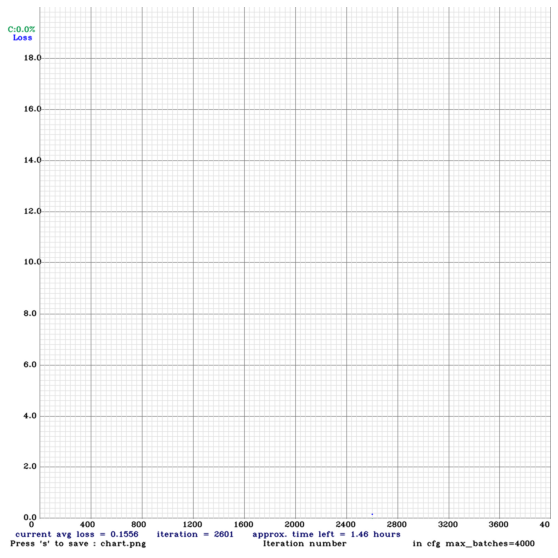

In [30]:
imShow('chart.png')

In [31]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


 CUDA-version: 10010 (10010), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5,  wt = 0, wn = 0, outputs: 104 x 104 x

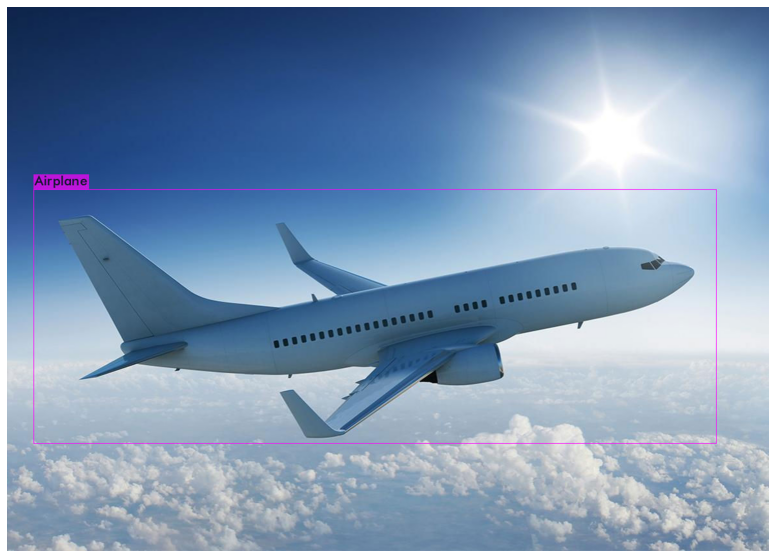

In [32]:
# run your custom detector with this command (upload an image to your google drive to test, thresh flag sets accuracy that detection must be in order to show it)
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/Colab_Notebooks/yolov3/backup/yolov3_custom_last.weights /mydrive/Colab_Notebooks/yolov3/plane.jpg -thresh 0.3
imShow('predictions.jpg')